In [108]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import warnings
warnings.filterwarnings("ignore")

from vega_datasets import data

In [109]:
# getting the data

df = data.stocks()


# lets take a loot at the data
df

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
...,...,...,...
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62


In [110]:
df = df.pivot_table('price', 'date', 'symbol')
df

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45
...,...,...,...,...,...
2009-11-01,199.91,135.91,583.00,125.79,29.27
2009-12-01,210.73,134.52,619.98,130.32,30.34
2010-01-01,192.06,125.41,529.94,121.85,28.05


In [111]:
# fill the missing values

df.GOOG = df.GOOG.fillna(0)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2000-01-01 to 2010-03-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    123 non-null    float64
 1   AMZN    123 non-null    float64
 2   GOOG    123 non-null    float64
 3   IBM     123 non-null    float64
 4   MSFT    123 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


In [113]:
df

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,0.00,100.52,39.81
2000-02-01,28.66,68.87,0.00,92.11,36.35
2000-03-01,33.95,67.00,0.00,106.11,43.22
2000-04-01,31.01,55.19,0.00,99.95,28.37
2000-05-01,21.00,48.31,0.00,96.31,25.45
...,...,...,...,...,...
2009-11-01,199.91,135.91,583.00,125.79,29.27
2009-12-01,210.73,134.52,619.98,130.32,30.34
2010-01-01,192.06,125.41,529.94,121.85,28.05


In [114]:
train_size = int(len(df) * 0.50)
validate_size = int(len(df) * .30)
test_size = int(len(df) - train_size - validate_size)

In [115]:
train = df[:train_size]

In [116]:
validate = df[train_size:validate_size + train_size]

In [117]:
test = df[-test_size:]

In [118]:
# ensuring we got the proper split

(len(train) + len(validate) + len(test)) == len(df)

True

In [119]:
# create a function that makes prediction

def predict(modeling_df, method):
    y_hat = np.full_like(modeling_df, method)
    return pd.DataFrame(y_hat, columns = modeling_df.columns, index = modeling_df.index)

In [120]:
method = train.mean().round(2)


y_hat = predict(validate, method)

In [121]:
y_hat

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2005-02-01,14.28,31.14,16.28,86.05,24.09
2005-03-01,14.28,31.14,16.28,86.05,24.09
2005-04-01,14.28,31.14,16.28,86.05,24.09
2005-05-01,14.28,31.14,16.28,86.05,24.09
2005-06-01,14.28,31.14,16.28,86.05,24.09
2005-07-01,14.28,31.14,16.28,86.05,24.09
2005-08-01,14.28,31.14,16.28,86.05,24.09
2005-09-01,14.28,31.14,16.28,86.05,24.09
2005-10-01,14.28,31.14,16.28,86.05,24.09


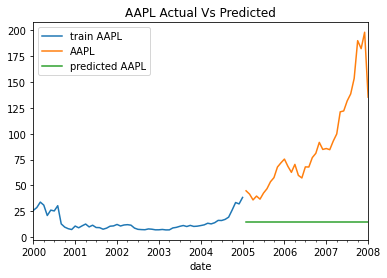

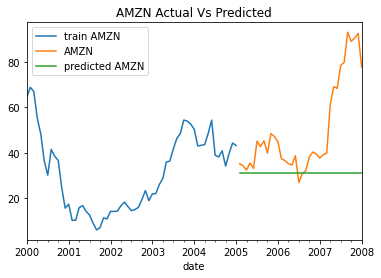

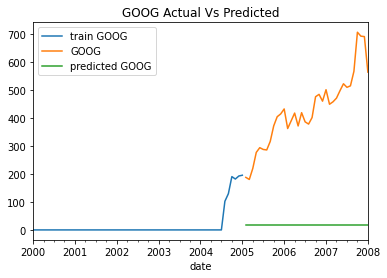

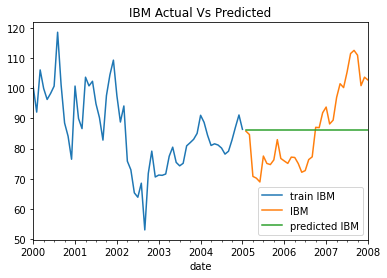

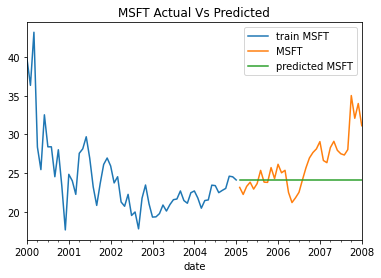

In [122]:
for col in validate.columns:
    train[col].plot(label = 'train ' + col)
    validate[col].plot(label = col)
    y_hat[col].plot(label = 'predicted ' + col)
    plt.legend()
    plt.title(col + ' Actual Vs Predicted')
    plt.show()

In [123]:
eval_df = pd.DataFrame(columns = ['model_name', 'target_var', 'rmse'])

In [124]:
eval_df

,model_name,target_var,rmse


In [125]:
def append_eval_df(model_name, target_var):
    rmse = sqrt(mean_squared_error(validate[target_var], y_hat[target_var]))
    df = {'model_name': [model_name], 'target_var': [target_var], 'rmse': [rmse]}
    df = pd.DataFrame(df)
    return eval_df.append(df, ignore_index = True)
    

In [126]:
for col in train.columns:
    eval_df=append_eval_df('simple_average', col)

In [127]:
eval_df

,model_name,target_var,rmse
0,simple_average,AAPL,84.771181
1,simple_average,AMZN,27.395426
2,simple_average,GOOG,429.684024
3,simple_average,IBM,13.099492
4,simple_average,MSFT,3.871716


<AxesSubplot:xlabel='date'>

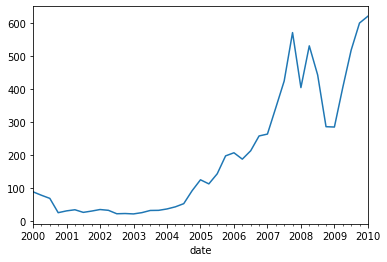

In [128]:
df.AAPL.resample('Q').sum().plot()

**Predict Using the Moving Average**

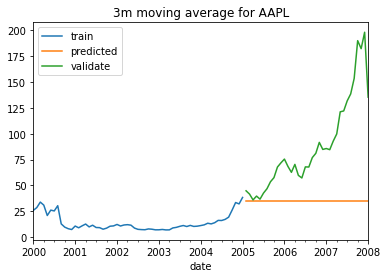

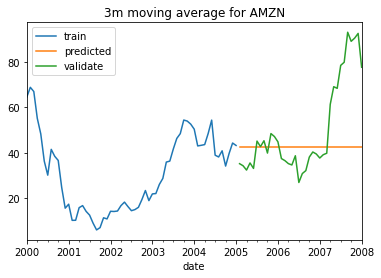

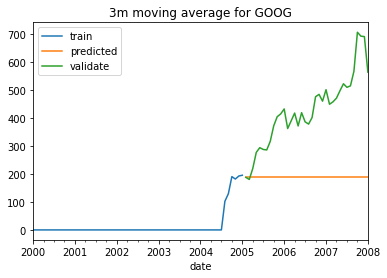

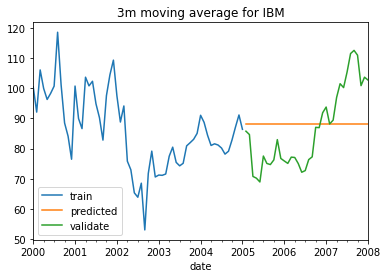

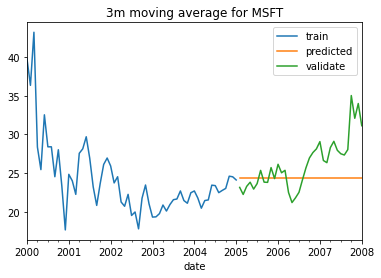

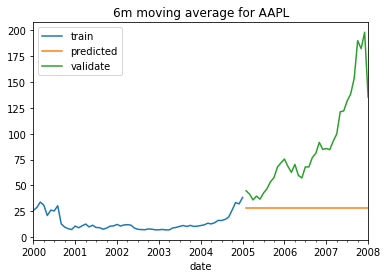

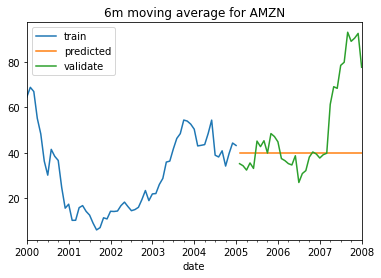

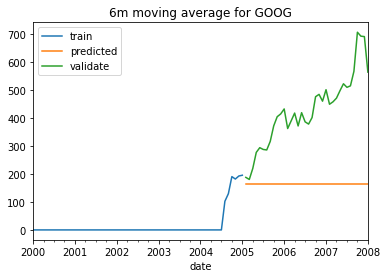

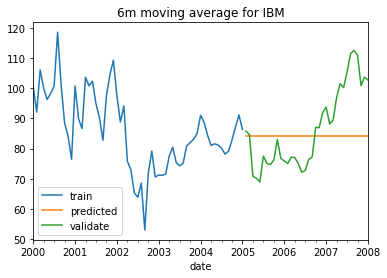

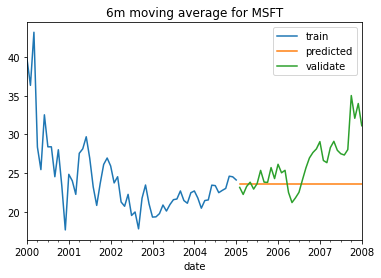

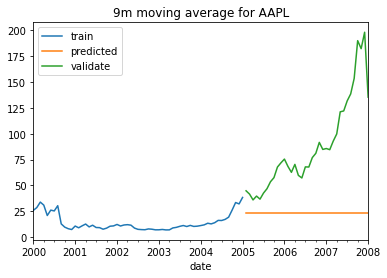

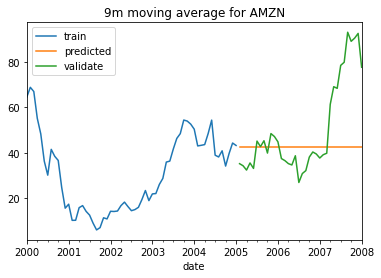

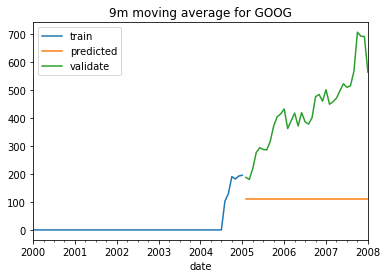

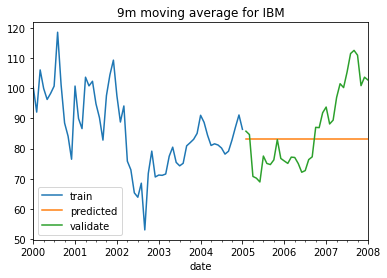

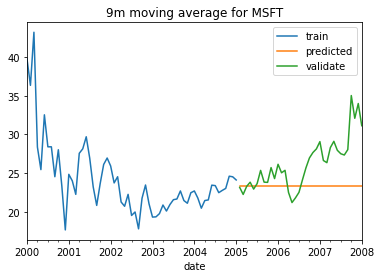

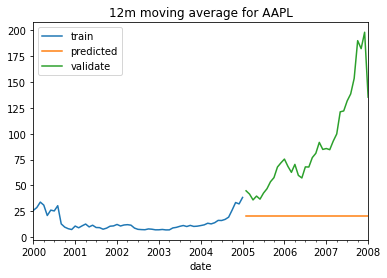

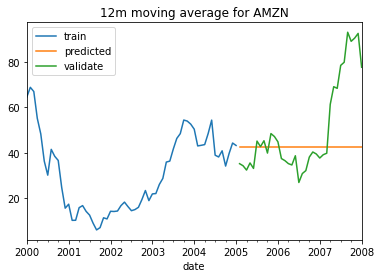

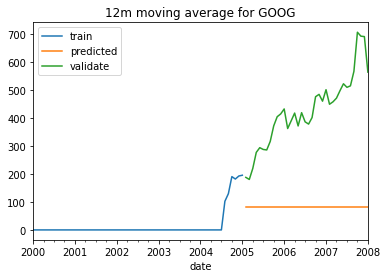

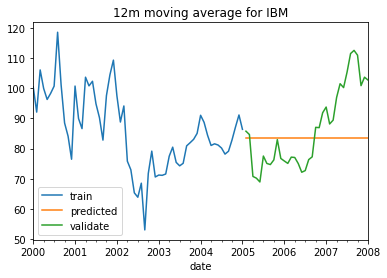

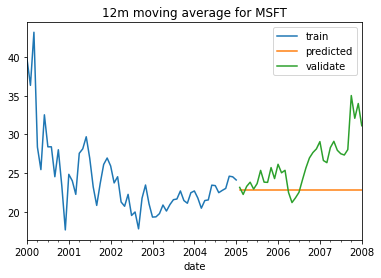

,model_name,target_var,rmse
0,simple_average,AAPL,84.771181
1,simple_average,AMZN,27.395426
2,simple_average,GOOG,429.684024
3,simple_average,IBM,13.099492
4,simple_average,MSFT,3.871716
5,3m moving average,AAPL,67.982905
6,3m moving average,AMZN,21.404117
7,3m moving average,GOOG,268.366175
8,3m moving average,IBM,13.241505
9,3m moving average,MSFT,3.710688


In [129]:
periods = [3,6,9,12]

for val in periods:
    val_average = train.rolling(val).mean().iloc[-1]
    y_hat = predict(validate, val_average)
    
    model_type = str(val) + 'm moving average'
    for column in train.columns:
        train[column].plot(label = 'train')
        y_hat[column].plot(label = 'predicted')
        validate[column].plot(label = 'validate')
        plt.legend()
        plt.title(str(val) +'m moving average for ' + column  )
        plt.show()
        eval_df = append_eval_df(model_type, column)
eval_df
  

**Holts Linear Trend**

In [130]:
import statsmodels.api as sm

AAPL 



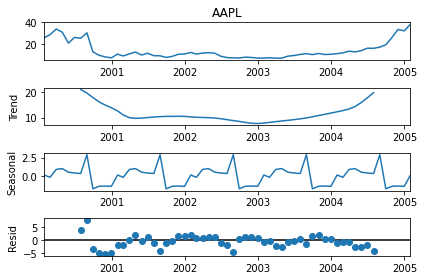

AMZN 



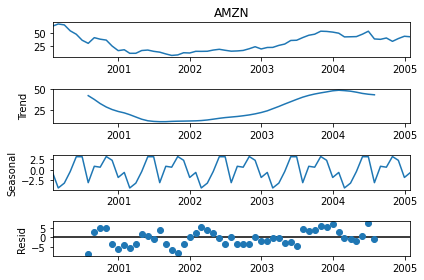

GOOG 



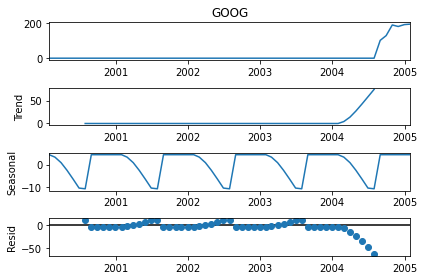

IBM 



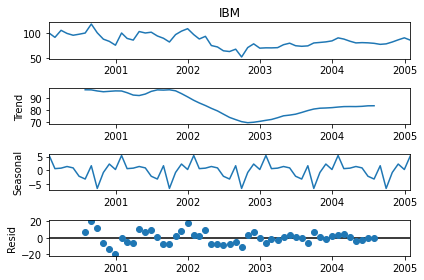

MSFT 



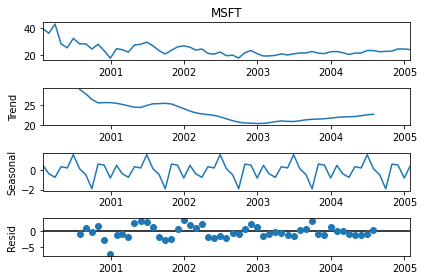

In [131]:
for col in train.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
    plt.show()

In [132]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    y_hat[col] = round(yhat_items, 2)

In [133]:
y_hat

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2005-02-01,23.01,53.17,102.68,86.04,24.46
2005-03-01,24.14,54.36,110.30,86.55,24.65
2005-04-01,25.26,55.55,117.92,87.07,24.85
2005-05-01,26.39,56.74,125.54,87.58,25.04
2005-06-01,27.51,57.93,133.17,88.09,25.24
2005-07-01,28.64,59.12,140.79,88.60,25.43
2005-08-01,29.76,60.31,148.41,89.12,25.63
2005-09-01,30.89,61.49,156.04,89.63,25.82
2005-10-01,32.01,62.68,163.66,90.14,26.02


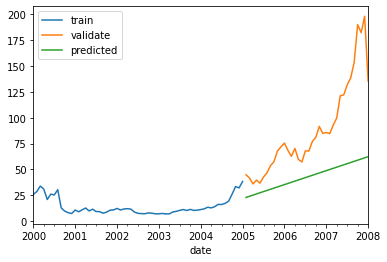

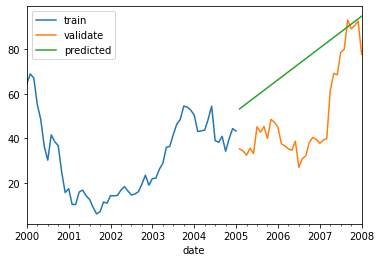

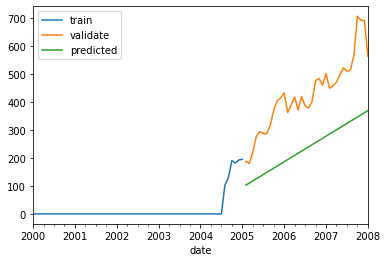

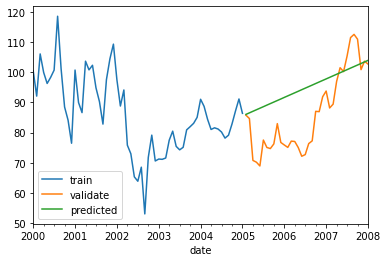

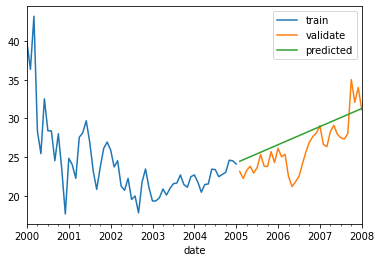

In [134]:
for col in train.columns:
    train[col].plot(label = 'train')
    validate[col].plot(label = 'validate')
    y_hat[col].plot(label = 'predicted')
    plt.legend()
    plt.show()

In [135]:
for column in train.columns:
        eval_df = append_eval_df('Holts', column)

In [136]:
eval_df

,model_name,target_var,rmse
0,simple_average,AAPL,84.771181
1,simple_average,AMZN,27.395426
2,simple_average,GOOG,429.684024
3,simple_average,IBM,13.099492
4,simple_average,MSFT,3.871716
5,3m moving average,AAPL,67.982905
6,3m moving average,AMZN,21.404117
7,3m moving average,GOOG,268.366175
8,3m moving average,IBM,13.241505
9,3m moving average,MSFT,3.710688


In [137]:
df['2010']

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2010-01-01,192.06,125.41,529.94,121.85,28.05
2010-02-01,204.62,118.40,526.80,127.16,28.67
2010-03-01,223.02,128.82,560.19,125.55,28.80


**Modeling Using Previous Year**

In [138]:
# Resplit the data

train = df[:'2007']
validate = df['2008']
test = df['2009':]

In [139]:
validate

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2008-01-01,135.36,77.70,564.30,102.75,31.13
2008-02-01,125.02,64.47,471.18,109.64,26.07
2008-03-01,143.50,71.30,440.47,110.87,27.21
2008-04-01,173.95,78.63,574.29,116.23,27.34
2008-05-01,188.75,81.62,585.80,125.14,27.25
2008-06-01,167.44,73.33,526.42,114.60,26.47
2008-07-01,158.95,76.34,473.75,123.74,24.75
2008-08-01,169.53,80.81,463.29,118.16,26.36
2008-09-01,113.66,72.76,400.52,113.53,25.78


In [140]:
y_hat = train['2007'] + train.diff(12).mean()
y_hat

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2007-01-01,101.673571,41.387381,579.894048,94.413214,29.014405
2007-02-01,100.553571,42.857381,527.844048,88.803214,26.574405
2007-03-01,108.853571,43.507381,536.554048,90.063214,26.294405
2007-04-01,115.743571,65.047381,549.774048,97.603214,28.244405
2007-05-01,137.133571,72.857381,576.304048,102.163214,29.054405
2007-06-01,137.983571,72.127381,601.094048,100.873214,27.894405
2007-07-01,147.703571,82.257381,588.394048,106.023214,27.444405
2007-08-01,154.423571,83.627381,593.644048,112.163214,27.284405
2007-09-01,169.413571,96.867381,645.664048,113.223214,27.984405


In [141]:
pd.concat([y_hat.head(1), validate.head(1)])

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2007-01-01,101.673571,41.387381,579.894048,94.413214,29.014405
2008-01-01,135.360000,77.700000,564.300000,102.750000,31.130000


In [142]:
# set yhat_df to index of validate
y_hat.index = validate.index

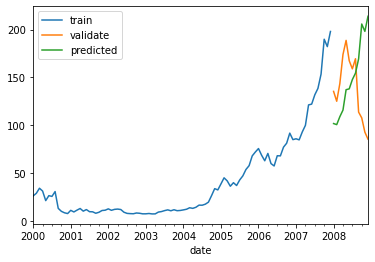

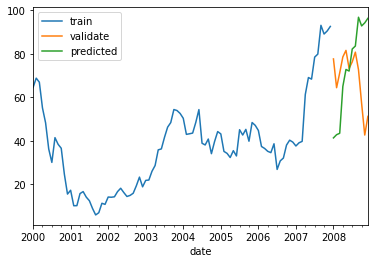

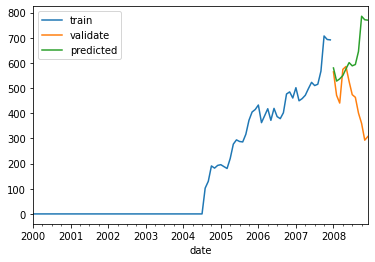

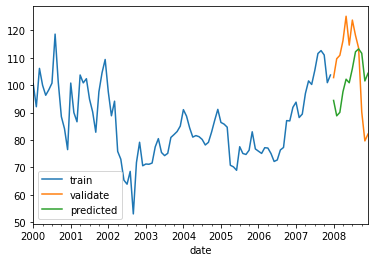

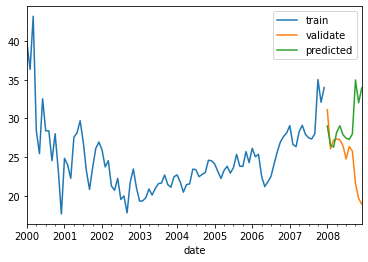

In [143]:
for col in train.columns:
    train[col].plot(label = 'train')
    validate[col].plot(label = 'validate')
    yhat_df[col].plot(label = 'predicted')
    plt.legend()
    plt.show()

In [144]:
for col in yhat_df.columns:
        eval_df = append_eval_df('Previous Year', col)

In [145]:
eval_df

,model_name,target_var,rmse
0,simple_average,AAPL,84.771181
1,simple_average,AMZN,27.395426
2,simple_average,GOOG,429.684024
3,simple_average,IBM,13.099492
4,simple_average,MSFT,3.871716
5,3m moving average,AAPL,67.982905
6,3m moving average,AMZN,21.404117
7,3m moving average,GOOG,268.366175
8,3m moving average,IBM,13.241505
9,3m moving average,MSFT,3.710688


In [146]:
# the best model
eval_df.groupby('target_var')[['rmse', 'model_name']].min()

,rmse,model_name
target_var,,
AAPL,55.478932,12m moving average
AMZN,21.311973,12m moving average
GOOG,200.416574,12m moving average
IBM,12.641809,12m moving average
MSFT,2.668974,12m moving average
